In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
import numpy as np
%matplotlib inline

In [58]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [59]:
results_path = "./frame_receive_benchmark"
frame_path = os.path.join(results_path, 'frames')
ping_path = os.path.join(results_path, 'pings')

In [60]:
frame_df.head()

frame_index  message_size  frame_receive_time                   timestamp
0     57017532           936               4.465  2020-01-27 17:32:55.963159
1     57017533           936               9.735  2020-01-27 17:32:55.973192
2     57017534           936               6.862  2020-01-27 17:32:55.980186
3     57017535           936              10.442  2020-01-27 17:32:55.990197
4     57017536           936               6.564  2020-01-27 17:32:55.997160

In [61]:
def read_csv_dir_to_df(path):
    all_csvs = glob.glob(os.path.join(path, "*.csv"))
    df_from_each_file = (pd.read_csv(f) for f in all_csvs)
    return pd.concat(df_from_each_file, ignore_index=True)

In [62]:
frame_results = read_csv_dir_to_df(frame_path); frame_results.head()

frame_index  message_size  frame_receive_time                   timestamp
0     63681355           936               1.377  2020-01-28 11:26:13.414127
1     63681356           936               7.005  2020-01-28 11:26:13.421641
2     63681357           936              10.087  2020-01-28 11:26:13.430803
3     63681358           936               8.026  2020-01-28 11:26:13.439804
4     63681359           936               9.227  2020-01-28 11:26:13.448892

In [63]:
ping_results = read_csv_dir_to_df(ping_path); ping_results.head()

message_size  ping_time                   timestamp
0            78     91.497  2020-01-28 11:26:13.409114
1            78     32.446  2020-01-28 11:26:13.943951
2            78     37.155  2020-01-28 11:26:14.483936
3            78     38.597  2020-01-28 11:26:15.023164
4            78     30.823  2020-01-28 11:26:15.554546

Text(0.5, 0, 'Ping Time / ms')

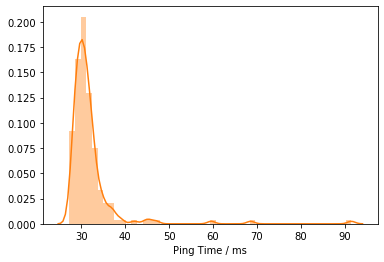

In [64]:
ping_times = ping_results['ping_time']
plt.figure()
sns.distplot(ping_times, color=colors[1])
plt.xlabel('Ping Time / ms')

In [65]:
def plot_percentiles(array, ylabel, color=None):
    plt.figure()
    percentiles = np.arange(0, 100.1, 0.1)
    ideal_percentiles = np.percentile(array, percentiles)
    plt.plot(percentiles, ideal_percentiles, c=color)
    plt.xlabel('Percentile')
    plt.ylabel(ylabel)


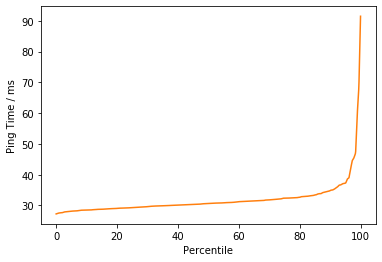

In [66]:
plot_percentiles(ping_times, 'Ping Time / ms', color=colors[1])

Text(0.5, 0, 'Frame Receive Time / ms')

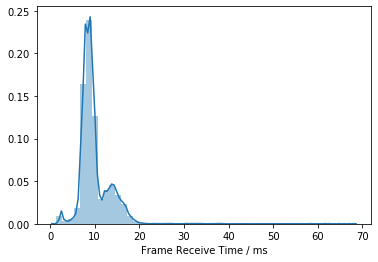

In [67]:
frame_receive_times = frame_results['frame_receive_time']
plt.figure()
sns.distplot(frame_receive_times)
plt.xlabel('Frame Receive Time / ms')

In [68]:
plot_percentiles(frame_receive_times, 'Frame Receive Time / ms')
